<a href="https://colab.research.google.com/github/tenyearstranger/DM_hw/blob/main/DW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install osmnx networkx pandas shapely geopy

In [13]:
import osmnx as ox
import networkx as nx
import pandas as pd
from shapely.geometry import Point, LineString
from geopy.distance import great_circle
from shapely.geometry import LineString
import ast


In [17]:
df = pd.read_csv('road.csv')

# 在 'coordinates' 列中删除包含 NaN 值的行
df = df.dropna(subset=['coordinates'])

# 将字符串坐标转换为 Python 对象（列表）
df['coordinates'] = df['coordinates'].apply(eval)

# 转换为 Shapely 的 LineString 对象
df['geometry'] = df['coordinates'].apply(LineString)

# 打印 LineString 对象
for line in df['geometry']:
    print("LineString Object:", line)

流式输出内容被截断，只能显示最后 5000 行内容。
LineString Object: LINESTRING (116.3469495 39.8909256, 116.3473902 39.8909324, 116.3481977 39.8909448, 116.3505077 39.8909804)
LineString Object: LINESTRING (116.3469495 39.8909256, 116.3469182 39.8917538, 116.3468732 39.8929442)
LineString Object: LINESTRING (116.3468007 39.89473, 116.3467503 39.895765)
LineString Object: LINESTRING (116.3468007 39.89473, 116.3468732 39.8929442)
LineString Object: LINESTRING (116.3468007 39.89473, 116.3444646 39.8946673)
LineString Object: LINESTRING (116.3468007 39.89473, 116.3469744 39.8947773, 116.3480152 39.8947744)
LineString Object: LINESTRING (116.3542375 39.8980809, 116.3539609 39.8983063)
LineString Object: LINESTRING (116.3542375 39.8980809, 116.3533898 39.8983344, 116.3528156 39.8986351, 116.3519703 39.8992084, 116.3513568 39.899945, 116.351186 39.9001933, 116.3509988 39.90047, 116.3508176 39.9008302, 116.3506058 39.9015962)
LineString Object: LINESTRING (116.3506058 39.9015962, 116.3505631 39.9025687, 116.3505531

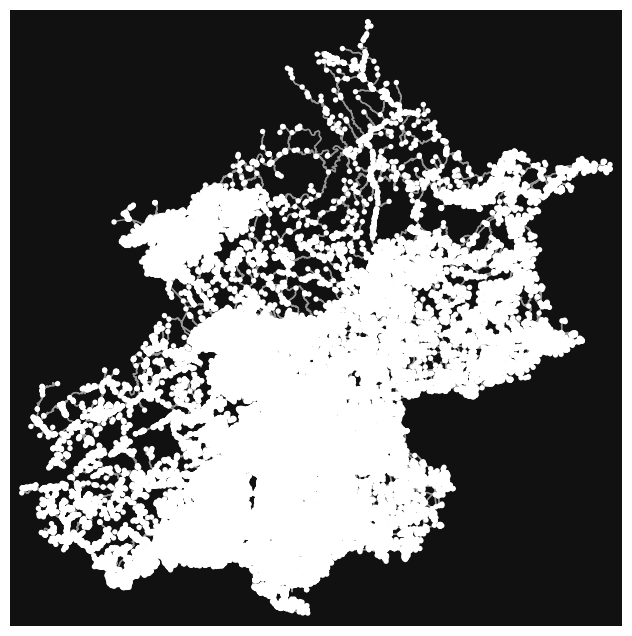

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
place_name = "Beijing, China"
graph = ox.graph_from_place(place_name, network_type="drive")
#简化
#graph_simplified = ox.simplify_graph(graph)
# 绘制路网地图
ox.plot_graph(ox.project_graph(graph))
#plt.show()

In [29]:
def match_to_network(geometry):
    # 获取最近的两个节点
    nearest_nodes = ox.distance.nearest_nodes(graph, geometry.xy[1][0], geometry.xy[0][0], return_dist=False)

    # 获取节点的坐标
    node1_coords = (graph.nodes[nearest_nodes[0]]['x'], graph.nodes[nearest_nodes[0]]['y'])
    node2_coords = (graph.nodes[nearest_nodes[1]]['x'], graph.nodes[nearest_nodes[1]]['y'])

    # 构建 LineString 对象表示路段
    edge = LineString([node1_coords, node2_coords])

    return edge

从这里开始跑不通！！！！！

In [30]:

df['matched_edge'] = df['geometry'].apply(match_to_network)

TypeError: ignored

In [ ]:
print(df[['geometry', 'matched_edge']])